In [1]:
import pandas as pd
import numpy as np

In [24]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [25]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [27]:
df.duplicated().sum()

24

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [30]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [31]:
df=pd.get_dummies(df,columns=['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS'],drop_first=True)

In [32]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight,0,...,0,0,1,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight,0,...,1,1,1,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight,1,...,0,0,1,0,1,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I,1,...,0,0,0,0,1,0,0,0,0,1
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III,0,...,0,0,1,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III,0,...,0,0,1,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III,0,...,0,0,1,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III,0,...,0,0,1,0,1,0,0,0,1,0


In [33]:
from collections import Counter

In [38]:
Counter(df['NObeyesdad'])

Counter({'Normal_Weight': 282,
         'Overweight_Level_I': 276,
         'Overweight_Level_II': 290,
         'Obesity_Type_I': 351,
         'Insufficient_Weight': 267,
         'Obesity_Type_II': 297,
         'Obesity_Type_III': 324})

In [36]:
df['Target']=np.where(df['NObeyesdad'].isin(['Normal_Weight','Insufficient_Weight']),0,1)

In [37]:
Counter(df['Target'])

Counter({0: 549, 1: 1538})

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample=SMOTE()

In [43]:
X=df.drop(['NObeyesdad','Target'],axis=1)

In [44]:
y=df['Target']

In [45]:
X,y=oversample.fit_resample(X,y)

In [46]:
Counter(y)

Counter({0: 1538, 1: 1538})

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scale=MinMaxScaler()

In [54]:
X_train_scaled=scale.fit_transform(X_train)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr=LogisticRegression()

In [55]:
model=lr.fit(X_train_scaled,y_train)

In [56]:
model.score(X_train_scaled,y_train)

0.9631067961165048

In [57]:
X_test_scaled=scale.transform(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [59]:
import matplotlib.pyplot as plt

In [60]:
predict=model.predict(X_test_scaled)

In [62]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       522
           1       0.94      0.96      0.95       494

    accuracy                           0.95      1016
   macro avg       0.95      0.95      0.95      1016
weighted avg       0.95      0.95      0.95      1016



In [70]:
prob=model.predict_proba(X_test_scaled)[:,1]

In [72]:
roc_auc_score(y_test,prob)

0.9925543301223881

In [73]:
fpr, tpr, thresholds = roc_curve(y_test,prob)

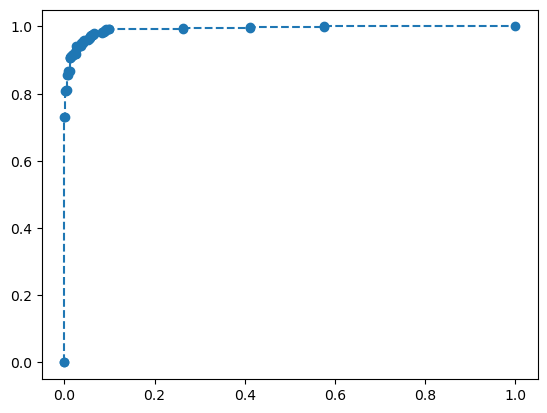

In [74]:
plt.plot(fpr,tpr,marker='o',linestyle='--')